# 데이터 집계와 시각화

### 주요 내용

1. 건수, 합계 평균 등 집계값 계산
2. 히스토그램, 상자그림, 막대그래프 등 그래프 작성 
3. 정렬 및 피벗테이블 활용

<br>

### 목표 
1. 집계값을 계산할 수 있다.
2. 적절한 그래프를 작성하고 올바르게 해석할 수 있다.
3. 피벗 테이블 등 다양한 방법으로 집계하고, 결과값을 적절히 정렬할 수 있다. 


<br>
<hr>
<br>

## 예제 및 실습 데이터 불러오기

In [ ]:
# 데이터 불러오기
import pandas as pd
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

In [ ]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

In [ ]:
#df_sp.describe()
#df_sp.describe(include='number')
df_sp.describe(include='object')

<br>

## 1. 수치형 변수의 집계값과 히스토그램

하나의 수치형 변수로 합계, 평균과 같은 집계값을 계산할 수 있고 히스토그램으로 분포를 확인


<br>

### 1.1. 수치형 변수의 집계값 계산

수치형 변수를 선택한 다음 sum( ), mean( ) 같은 메서드를 활용해서 단순한 집계값을 계산  
먼저 변수를 선택하고 다양한 집계 함수를 메서드로 활용

In [ ]:
# 관심 변수 선택
df_ins['charges']

In [ ]:
# 수치형 변수의 집계값 계산
    # mean( ) : 수치형 Series의 메서드
df_ins['charges'].mean()

In [ ]:
df_ins['charges'].sum()

In [ ]:
# 분산과 표준편차계산
df_ins['charges'].var(), df_ins['charges'].std()

In [ ]:
# 관측치 수 계산하기
df_ins['charges'].kurt()

<br>

### 1.2. 히스토그램 그리기

하나의 수치형변수의 분포를 파악하기 위해서 히스토그램을 활용  
Python에서 그래프를 그릴때는 기본적으로 matplotlib 라이브러리를 활용하지만, 좀 더 가독성이 좋고 그래프가 이쁜 seaborn 라이브러리를 추가로 활용   



<br>

#### 1.2.1. pandas의 메서드와 matplotlib을 활용한 그래프

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 가장 간단한 히스토그램과 상자그림
    # DataFrame의 plot 메서드 활용
    # plt.show() : 최종 그래프 출력함수, 생략 가능
df_ins['age'].plot(kind='hist')
plt.show()

In [ ]:
# matplotlib의 hist( )를 활용한 히스토그램 그리기
plt.hist(df_ins['charges'])

<br>

#### 1.2.2. seaborn을 활용한 히스토그램

seaborn 라이브러리를 활용하면 그래프를 그리는 명령어가 좀 더 직관적이고 DataFrame 형식을 활용하기 편함

In [ ]:
# histplot()을 활용한 히스토그램
sns.histplot(data=df_ins,
             x='charges')

In [ ]:
print(5+5)

<br>

#### [실습] 한 수치형 변수에 대한 요약과 시각화

1. df_sp에서 'math score'의 평균 계산하기

2. df_sp에서 'math score'의 히스토그램을 matplotlib으로 그려기

3. df_sp에서 'math score'의 히스토그램을 seaborn으로 그려기



In [ ]:
df_sp.describe().loc['mean', 'math score']

In [ ]:
df_sp['math score'].mean()

In [ ]:
plt.hist(df_sp['math score'])

In [ ]:
sns.histplot(data=df_sp, y='math score')

### 1.3. 분위수와 상자그림

`quantile()`을 활용해서 분위수를 계산  

최솟값(minimum, 0%), Q1(1st Quartile, 25%), 중앙값(median, 50%), Q3(3rd Quartile, 75%), 최댓값(maximum, 100%)을 사분위수(quartile)이라고 부르고, **상자그림(boxplot)** 으로 시각화

In [ ]:
df_ins['charges'].quantile(0.5)

In [ ]:
df_ins['charges'].quantile([0.0, 0.25, 0.5, 0.75, 1.0, 0.8 ,0.9])
    ## quantile( ) : 계산할 분위(1.0이 최댓값) 를 리스트로 묶기

In [ ]:
# matplotlib의 boxplot()으로 상자그림 그리기
plt.boxplot(df_ins['bmi'])
plt.show()

In [ ]:
# boxplot( )을 활용한상자그림
sns.boxplot(data=df_ins,
            y='bmi')

<br>


#### [실습]

1. df_sp에서 'reading score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
2. df_sp에서 'reading score'의 상자그림을 seaborn으로 그리기

In [ ]:
df_sp['reading score'].quantile([0.25, 0.5, 0.75])

In [ ]:
sns.boxplot(data=df_sp, y='reading score')
plt.show()

<br>

## 2. 범주형 변수의 요약과 시각화  

범주형 변수는 정해진 수준(level) 중에 하나의 값을 갖기 때문에 분석 방법이 단순하며 개수를 세면 됨

<br>


### 2.1. 그룹별 건수 계산과 시각화

> SQL에서도 가장 잦은 키워드 조합이 `SELECT COUNT(1) ... GROUP BY ...`입니다.  

범주형 변수/그룹 변수로 수준별 관측치 수를 셀 수 있고, 막대그래프로 표현


In [ ]:
# 수준(levels) 및 개수 확인 
#df_ins['smoker'].unique()
df_ins['smoker'].drop_duplicates()

In [ ]:
df_ins['smoker'].nunique()

<br>

#### 2.1.1. 수준별 관측치 수 계산 및 막대그래프 작성

In [ ]:
# 수준별 관측치 수 세기
df_ins['smoker'].value_counts()

In [ ]:
# plot( ) 메서드를 활용한 막대그래프 
df_ins['smoker'].value_counts().plot(kind='bar')

In [ ]:
# seaborn을 활용한 막대그래프
sns.countplot(data=df_ins,
              x='smoker')

#### [실습]

1. 데이터 df_sp에서 'parental level of education'별 관측치 수를 계산하고 matplotlib 막대그래프 그리기
2. 'race/ethnicity'별 관측치 수를 계산하고, seaborn 막대그래프로 그리기

In [ ]:
df_sp.head()

In [ ]:
df_size

<Axes: xlabel='parental level of education', ylabel='count'>

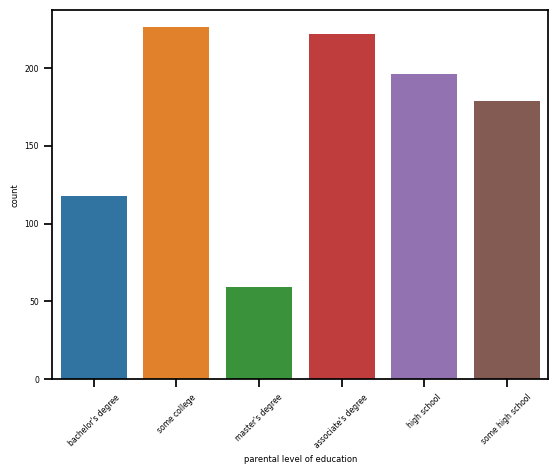

In [165]:
plt.xticks(rotation=45)
sns.set_context("notebook", font_scale=0.5, rc={"lines.linewidth": 2.5})
sns.countplot(data=df_sp, x='parental level of education')

<Axes: >

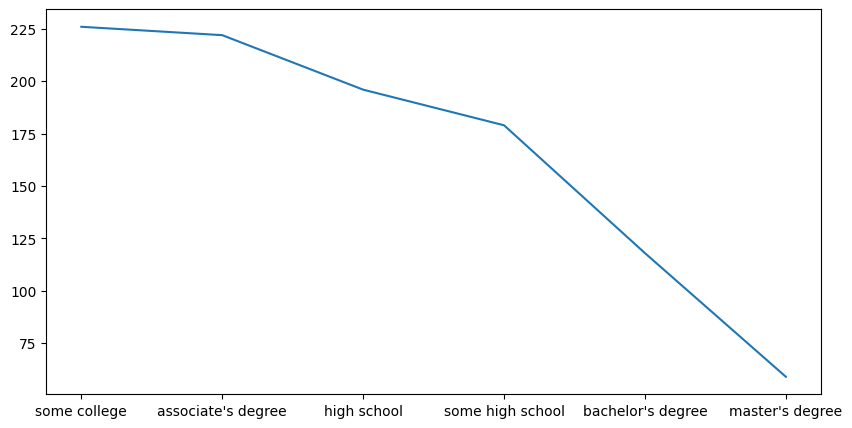

In [161]:
plt.figure(figsize=(10,5))
df_sp['parental level of education'].value_counts().plot()

In [ ]:
plt.plot(df_sp['parental level of education'].value_counts())

In [ ]:
df_size = df_sp.groupby('parental level of education', as_index=False).size()
plt.bar(df_size['parental level of education'], df_size['size'])

In [ ]:
df_sp['parental level of education'].value_counts()

In [ ]:
df_sp['race/ethnicity'].value_counts()

In [ ]:
j = 0
for i in range(5):
    j = j + i
print(j)

In [ ]:
print('hi')
sns.countplot(
    data=df_sp.sort_values('race/ethnicity'),
    x='race/ethnicity'
)

<br>  

## 3. 산점도와 상관계수의 활용 

두 수치형 변수의 관계를 파악하기 위해서 **산점도(scatterplot)** 를 그리고 **상관계수(correlation coefficient)** 를 계산  

In [ ]:
# 예제 데이터 불러오기
    # 아빠키와 아들키
df_heights = pd.read_csv('data/heights.csv')
df_heights

In [ ]:
# seaborn으로 산점도 그리기
mean_f = df_heights['father'].mean()
mean_s = df_heights['son'].mean()
print(mean_f, mean_s)

plt.figure(figsize=(5,5))

sns.scatterplot(data=df_heights, 
                x='father', 
                y='son', 
                alpha=0.3)
plt.axhline(mean_s) # 수평선 추가
plt.axvline(mean_f) # 수직선 추가

lims = [
    df_heights['son'].min() , df_heights['son'].max(),  # max of both axes
]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

plt.show()

In [ ]:
# 공분산 계산하기
df_heights[['father','son']].cov()

In [ ]:
# 상관계수 계산하기
df_heights[['father','son']].corr()

#### [실습] 두 수치형 변수의 관계 탐색
 
1. df_sp에서 'math score'와 'reading score'의 산점도를 그리고 상관계수 계산하기
2. df_ins에서 'bmi'와 'charges'의 산점도를 그리고 상관계수 계산하기
3. (같이) df_ins에서 데이터 부분 선택을 활용해서 'bmi'와 'charges'의 상관계수를 'smoker'별로 나눠 계산하기

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


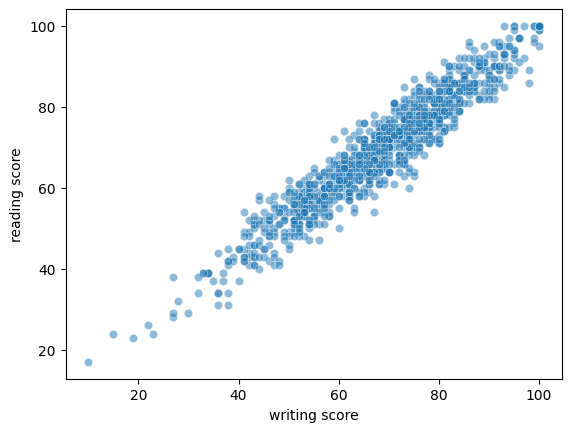

In [100]:
sns.scatterplot(data=df_sp, x='writing score', y='reading score', alpha=0.5)
df_sp.filter(regex='score').corr()

<Axes: xlabel='bmi', ylabel='charges'>

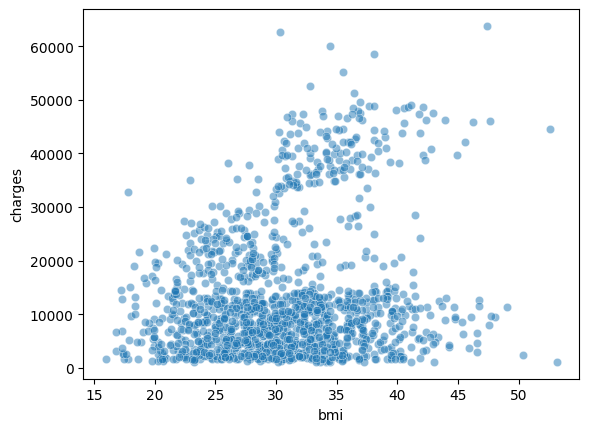

In [111]:
sns.scatterplot(data=df_ins, x='bmi', y='charges', alpha=0.5)

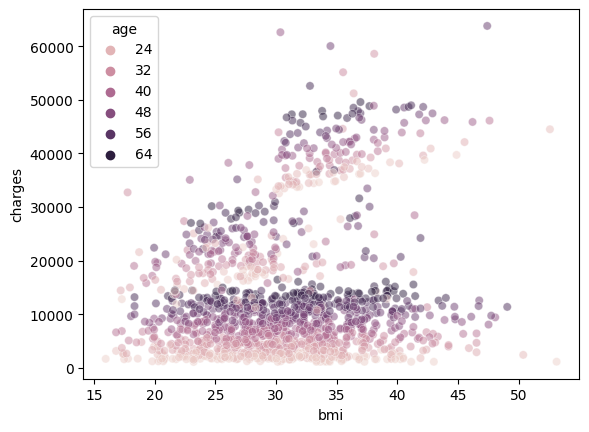

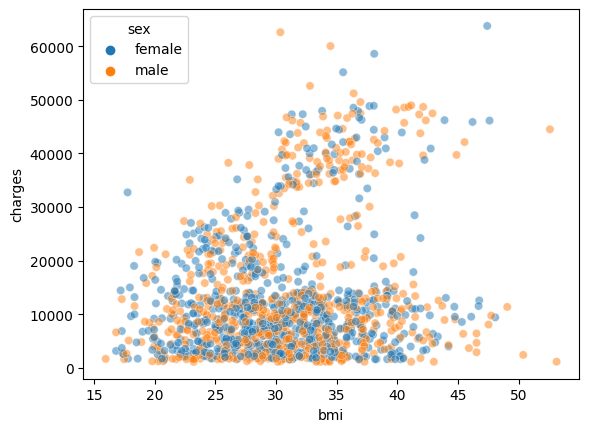

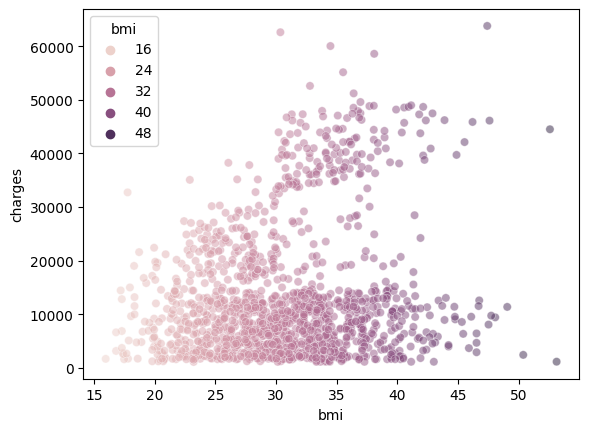

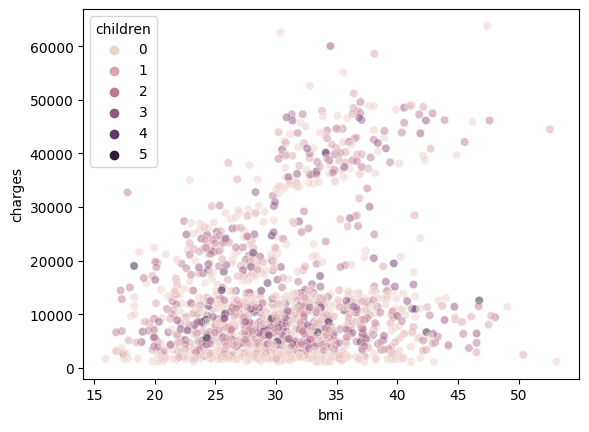

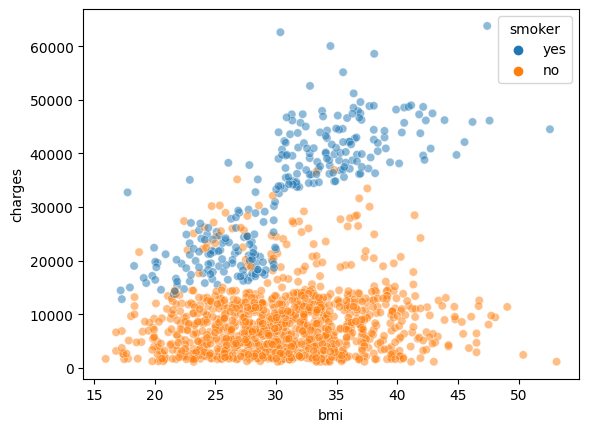

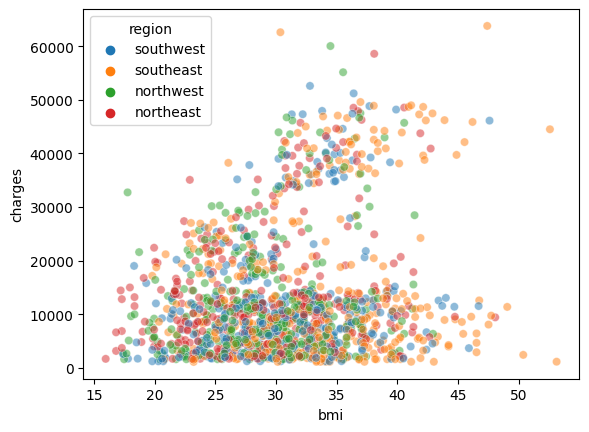

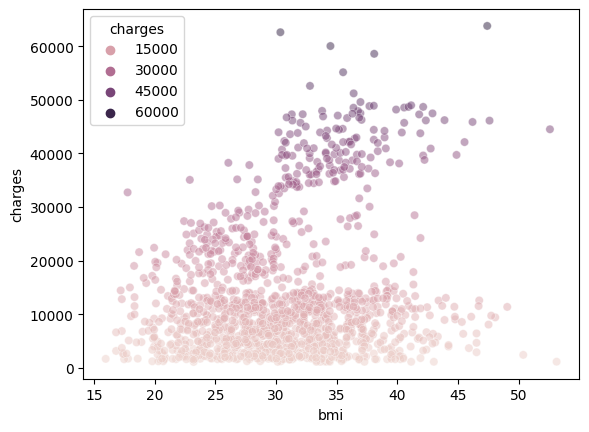

In [110]:
for col in df_ins.columns:
    sns.scatterplot(data=df_ins, x='bmi', y='charges', alpha=0.5, hue=col)
    plt.show()

In [99]:
df_ins[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [103]:
df_ins[ df_ins['smoker'] == 'yes' ][['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


In [104]:
df_ins[ df_ins['smoker'] == 'no' ][['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.084037
charges,0.084037,1.000000


In [113]:
df_ins.groupby('region')[['bmi', 'charges']].corr()

bmi   charges
region                               
northeast bmi      1.000000  0.231712
          charges  0.231712  1.000000
northwest bmi      1.000000  0.181073
          charges  0.181073  1.000000
southeast bmi      1.000000  0.142994
          charges  0.142994  1.000000
southwest bmi      1.000000  0.222928
          charges  0.222928  1.000000

In [ ]:
sns.scatterplot(data=df_ins, x='bmi', y='charges', alpha=0.5)
df_ins[['bmi', 'charges']].corr()

In [ ]:
df_ins[df_ins['smoker']=='yes'][['bmi', 'charges']].corr()

In [ ]:
sns.scatterplot(data=df_ins, x='bmi', y='charges', alpha=0.5, hue='smoker')

<br>


## 4. 그룹별 집계값의 계산과 분포 비교

범주형 변수를 그룹처럼 활용해서 그룹별 평균을 계산하고, 그룹별 상자그림을 그려서 그룹간 분포를 비교  
한 변수의 집계에서 `groupby()`를 추가하면 되고, 필요에 따라 `agg()`를 활용 가능 

In [114]:
# 전체 평균 계산
df_ins['charges'].mean()

13270.422265141257

In [115]:
# 그룹별 평균 계산
df_ins.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [116]:
# 그룹별 평균 계산(DataFrame 형식으로 출력)
df_ins.groupby('sex', as_index=False)['charges'].mean()

,sex,charges
0,female,12569.578844
1,male,13956.751178


<br>

다양한 그룹 집계값의 계산 예제

In [117]:
# 여러개 그룹변수를 활용한 평균 계산
df_ins.groupby(['sex', 'smoker'], as_index=False)['charges'].mean()

,sex,smoker,charges
0,female,no,8762.297300
1,female,yes,30678.996276
2,male,no,8087.204731
3,male,yes,33042.005975


In [118]:
# 그룹별 여러 변수의 평균 계산 
df_ins.groupby('sex', as_index=False)[ ['charges', 'age'] ].mean()

,sex,charges,age
0,female,12569.578844,39.503021
1,male,13956.751178,38.917160


In [119]:
# 그룹별 한 변수의 여러 집계값 계산
df_ins.groupby('sex', as_index=False)['charges'].agg(['min','max','mean'])

,min,max,mean
sex,,,
female,1607.5101,63770.42801,12569.578844
male,1121.8739,62592.87309,13956.751178


In [120]:
# 일반적인 그룹별 집계값 계산
df_ins.groupby('sex', as_index=False).agg({'age':['min','max','mean'], 'charges':['mean', 'median']})

sex age                      charges            
          min max       mean          mean      median
0  female  18  64  39.503021  12569.578844  9412.96250
1    male  18  64  38.917160  13956.751178  9369.61575

In [134]:
df_corr = df_ins.groupby('sex')[['bmi','charges']].mean()
df_corr.round(2)

,bmi,charges
sex,,
female,30.38,12569.58
male,30.94,13956.75


In [136]:
df_ins.groupby('sex', as_index=False)[['charges', 'age']].mean()

,sex,charges,age
0,female,12569.578844,39.503021
1,male,13956.751178,38.917160


In [137]:
df_ins.groupby('sex', as_index=False)[['charges', 'age']].corr()

charges       age
0 charges  1.000000  0.324575
  age      0.324575  1.000000
1 charges  1.000000  0.282369
  age      0.282369  1.000000

<br>

그룹 평균 등에 대응하는 그래프를 활용한 그룹 분포 비교

<Axes: xlabel='charges', ylabel='Count'>

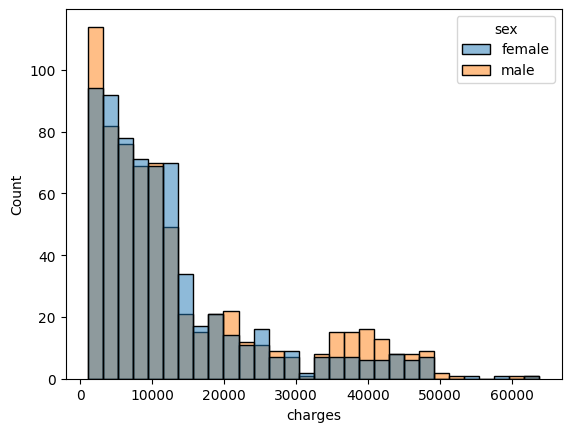

In [138]:
# 겹쳐그린 히스토그램 
sns.histplot(data=df_ins, 
             x = 'charges',
             hue='sex')

<Axes: xlabel='charges', ylabel='Count'>

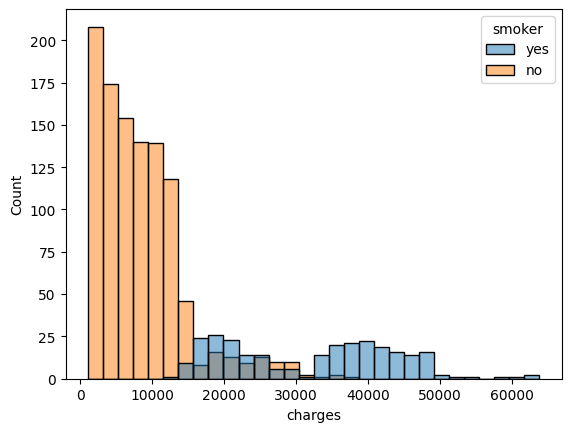

In [140]:
sns.histplot(data=df_ins, 
             x = 'charges',
             hue='smoker')

<Axes: xlabel='charges', ylabel='Count'>

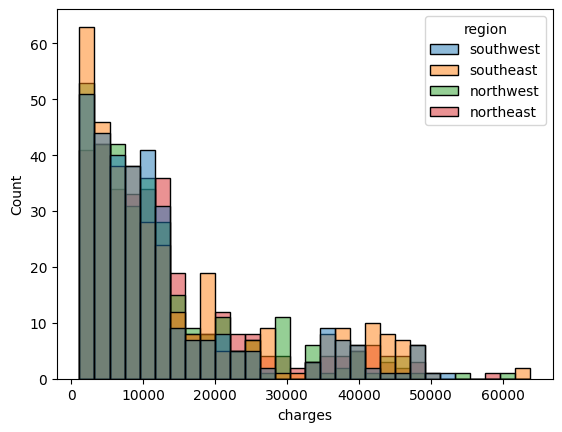

In [139]:
# 많이 겹치기 어려운 히스토그램
sns.histplot(data=df_ins, 
             x = 'charges',
             hue='region')

<Axes: xlabel='sex', ylabel='charges'>

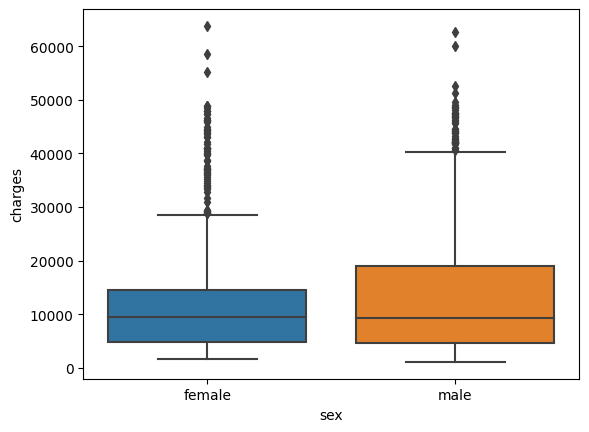

In [141]:
# 그룹별 상자그림 
sns.boxplot(data=df_ins,
            x='sex', 
            y='charges')

<Axes: xlabel='region', ylabel='charges'>

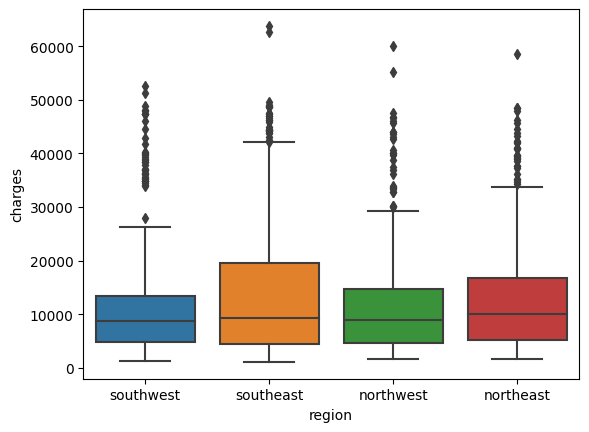

In [142]:
sns.boxplot(data=df_ins,
            x='region', 
            y='charges')

<Axes: xlabel='region', ylabel='charges'>

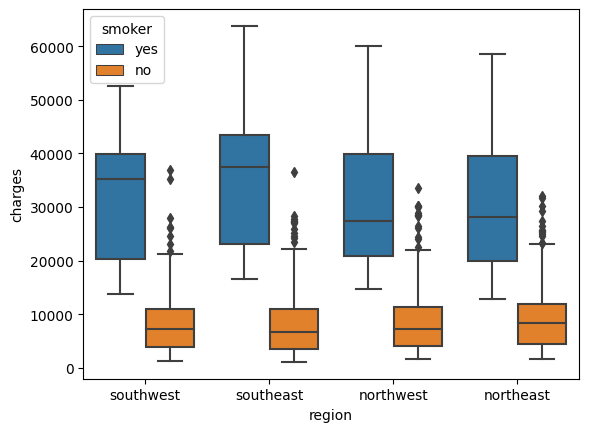

In [143]:
# hue를 추가로 활용한 상자그림
sns.boxplot(data=df_ins,
            x='region', 
            y='charges',
            hue='smoker')

#### [실습] 변수 관계 탐색

1. 데이터 df_sp에서 수치형 변수 하나와 범주형 변수 하나를 선택해서 그룹별 평균을 계산하고 상자그림 그리기
2. 데이터 df_sp에서 두 그룹 변수를 활용해서 `math score`의 평균을 계산하기
3. 2.의 세 변수를 x, y, hue로 활용해 seaborn으로 상자그림 그리기




In [144]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [145]:
df_sp.groupby('race/ethnicity', as_index=False)['math score'].mean()

,race/ethnicity,math score
0,group A,61.629213
1,group B,63.452632
2,group C,64.463950
3,group D,67.362595
4,group E,73.821429


<Axes: xlabel='race/ethnicity', ylabel='math score'>

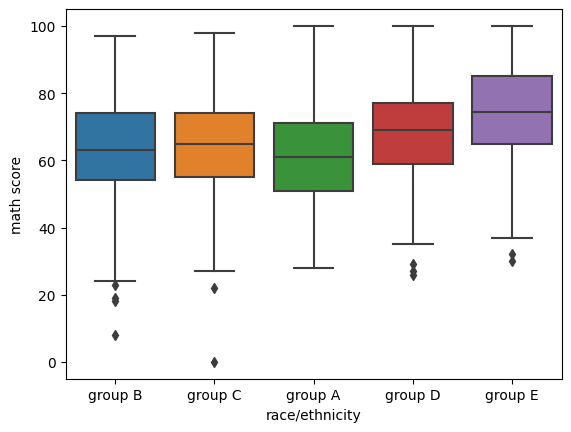

In [146]:
sns.boxplot(data=df_sp, x='race/ethnicity', y='math score')

In [147]:
df_sp.groupby(['race/ethnicity', 'gender'], as_index=False)['math score'].mean()

,race/ethnicity,gender,math score
0,group A,female,58.527778
1,group A,male,63.735849
2,group B,female,61.403846
3,group B,male,65.930233
4,group C,female,62.033333
5,group C,male,67.611511
6,group D,female,65.248062
7,group D,male,69.413534
8,group E,female,70.811594
9,group E,male,76.746479


<Axes: xlabel='race/ethnicity', ylabel='reading score'>

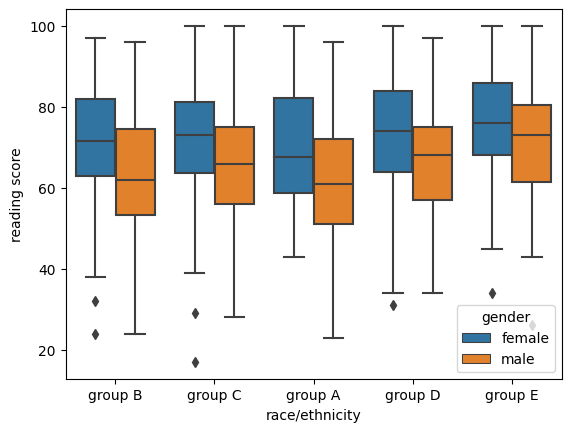

In [149]:
sns.boxplot(data=df_sp, x='race/ethnicity', y='reading score', hue='gender')

## 5. 피벗 테이블과 열지도의 활용

pandas의 *pivot_table()* 을 활용하면 Excel의 피벗테이블과 동일한 표 형태의 집계 가능

In [150]:
# pivot_table()을 활용한 교차표 작성
    ## values : 값 변수
    ## index  : 행 그룹변수
    ## columns: 열 그룹변수 
    ## aggfunc: 집계 함수
pd.pivot_table(df_ins, values='charges', index='sex', columns='region', aggfunc='size')

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [152]:
# pivot_table()을 활용한 평균 피벗테이블
pd.pivot_table(df_ins, values='charges', index='sex', columns='region', aggfunc='mean')
pd.pivot_table(df_ins, 'charges', 'sex', 'region')

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [155]:
df_ins.groupby(['sex', 'region'], as_index=False)['charges'].mean()

,sex,region,charges
0,female,northeast,12953.203151
1,female,northwest,12479.870397
2,female,southeast,13499.669243
3,female,southwest,11274.411264
4,male,northeast,13854.005374
5,male,northwest,12354.119575
6,male,southeast,15879.617173
7,male,southwest,13412.883576


In [153]:
# DataFrmae의 method, pivot_table()을 활용한 평균 피벗테이블
agg2_wide = df_ins.pivot_table(values='charges', index='sex', columns='region', aggfunc='mean')
agg2_wide

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [168]:
# margins 옵션 활용
pt = df_ins.pivot_table(values='charges', index='sex', columns='region', aggfunc='mean', margins=True)
pt

region,northeast,northwest,southeast,southwest,All
sex,,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264,12569.578844
male,13854.005374,12354.119575,15879.617173,13412.883576,13956.751178
All,13406.384516,12417.575374,14735.411438,12346.937377,13270.422265


In [169]:
pt.loc['female'] + pt.loc['male']

region
northeast    26807.208525
northwest    24833.989971
southeast    29379.286416
southwest    24687.294840
All          26526.330022
dtype: float64

<Axes: xlabel='region', ylabel='sex'>

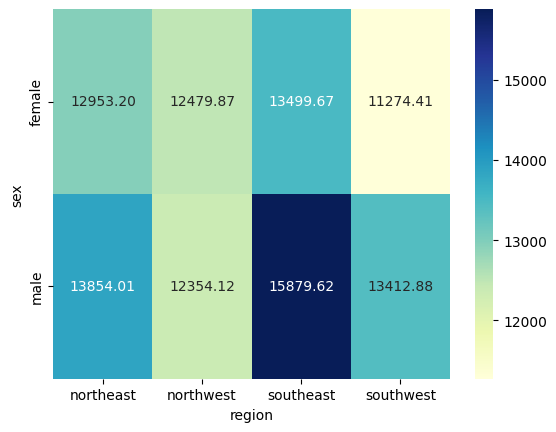

In [157]:
# 열지도 시각화
#sns.heatmap(agg2_wide)

sns.heatmap(agg2_wide, cmap='YlGnBu', annot=True, fmt='.2f')

* 참고: [Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

<br>

#### [실습] df_sp 활용

1. 'race/ethnicity', 'parental level of education'별 'math score'의 평균을 피벗테이블로 계산
2. 1.의 결과를 열지도로 시각화

In [ ]:
df_sp.head()

In [177]:
pt = df_sp.pivot_table(values='math score',
                  index='race/ethnicity',
                  columns='parental level of education',
                  aggfunc='mean') 
pt

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,61.000000,67.166667,60.444444,57.666667,63.888889,58.916667
group B,66.097561,69.300000,59.791667,67.166667,63.189189,61.815789
group C,66.730769,68.150000,60.906250,67.052632,65.130435,60.551020
group D,67.600000,67.571429,62.863636,72.521739,68.731343,66.760000
group E,74.897436,76.555556,70.772727,74.625000,73.828571,72.111111


In [182]:
pt['high school'].sum()

314.77872474747477

In [180]:
pt.sum(axis=1)

race/ethnicity
group A    369.083333
group B    387.360873
group C    388.521106
group D    406.048147
group E    442.790401
dtype: float64

In [176]:
pt.loc['group A'] + pt.loc['group B'] + ... + ... + ...

parental level of education
associate's degree    127.097561
bachelor's degree     136.466667
high school           120.236111
master's degree       124.833333
some college          127.078078
some high school      120.732456
All                   125.081845
dtype: float64

<Axes: title={'center': 'math score'}, xlabel='parental level of education', ylabel='race/ethnicity'>

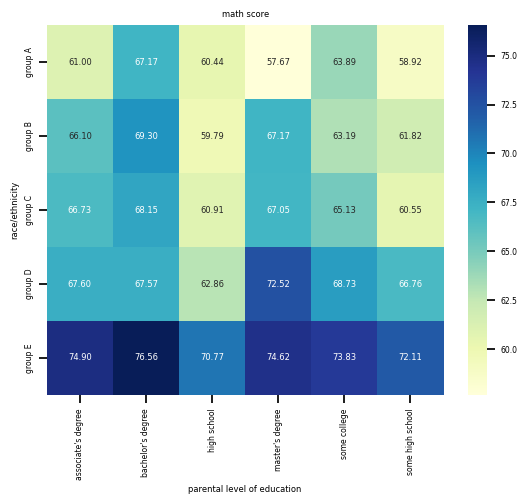

In [184]:
plt.title("math score")
sns.heatmap(pt, cmap='YlGnBu', annot=True, fmt='.2f')

<Axes: xlabel='race/ethnicity', ylabel='math score'>

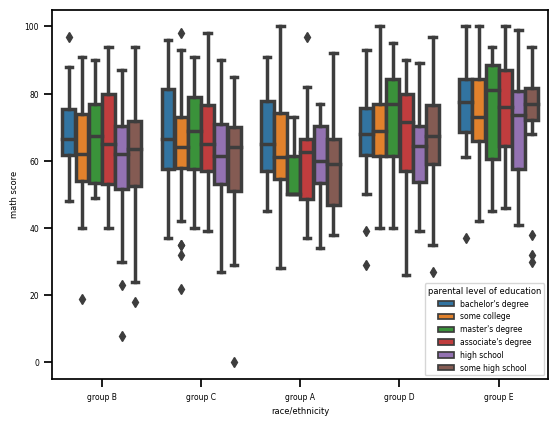

In [183]:
sns.boxplot(data=df_sp, x='race/ethnicity', y='math score', hue='parental level of education')

<br>

## 6. [참고]결과 데이터와 그래프의 저장

함수를 활용해서 분석 결과 데이터와 그래프를 저장 가능

In [185]:
# 폴더 생성
%mkdir result

In [186]:
# 대상 결과 데이터 확인
pt1 = df_ins.pivot_table(index='region', columns='smoker', values='charges', aggfunc='mean')
pt1

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


In [187]:
# to_csv()로 결과 데이터를 csv 형식으로 저장하기
pt1.to_csv('result/result.csv', index=True)

<Axes: xlabel='smoker', ylabel='region'>

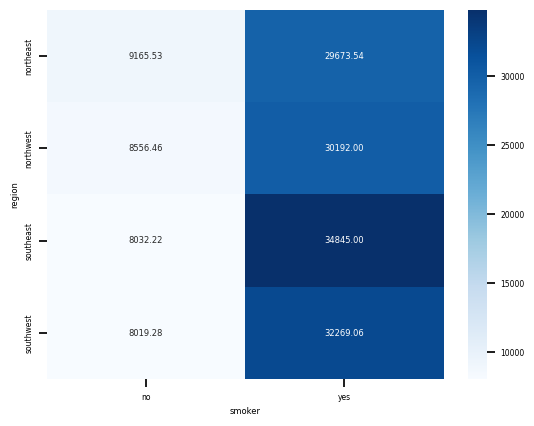

In [188]:
# 대상 그래프 확인
plot1 = sns.heatmap(pt1, cmap='Blues', annot=True, fmt='.2f')
plot1

In [189]:
# savefig()을 활용한 그래프 저장
plot1.figure.savefig('result/plot1.jpg')

#### End of script